In [1]:
import numpy as np
import random
import scipy.stats as ss
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def distance(p1, p2):
    """
    Find the distance between Point 1 and Point 2
    """    
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

In [3]:
def majority_vote(votes):
    """
    Return the most common element in votes.
    """
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    
    return random.choice(winners)

# Alternative to above function 

def majority_vote_short(votes):
    """
    Return the most common element in votes.
    """
    mode, count = ss.mstats.mode(votes)
    return mode

In [4]:
def find_nearest_neighbours(p, points, k=5):
    """
    Find the nearest k neighbours of point p and return their indices.
    """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

def knn_predict(p, points, outcomes, k=5):
    """
    To predict k-nearest neighbors
    """
    ind = find_nearest_neighbours(p, points, k)
    return majority_vote(outcomes[ind])

In [5]:
def generate_synth_data(n=50):
    """
    Create two sets of points from bivartiate normal distributions.
    """
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

In [6]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """
    Classify each point on the prediction grid.
    """
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)  
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
         p = np.array([x,y])
         prediction_grid[j, i] = knn_predict(p, predictors, outcomes, k)
         
    return (xx, yy, prediction_grid)

In [7]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ 
    Plot KNN predictions for every point on the grid.
    """
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5, shading='auto')
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

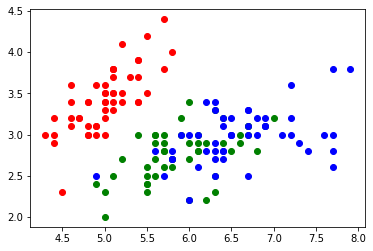

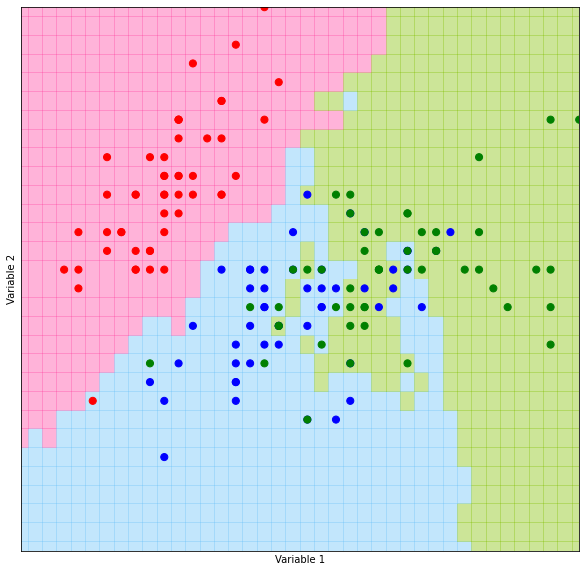

In [8]:
iris = datasets.load_iris()
iris["data"]

predictors  = iris.data[:, 0:2]
outcomes = iris.target

plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo")
plt.savefig("iris.pdf")

k=5; filename="iris_grid.pdf"; limits =  (4,8,1.5,4.5); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [9]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

print(100 * np.mean(sk_predictions == my_predictions))
print(100 * np.mean(sk_predictions == outcomes))
print(100 * np.mean(my_predictions == outcomes))

96.0
83.33333333333334
84.66666666666667


In [10]:
#Testing Data

# p1 = np.array([1, 1])
# p2 = np.array([4, 4])
# distance(p1, p2)

# votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
# winner = majority_vote(votes)
# winner1 = majority_vote_short(votes)
# print(winner, winner1)

# points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
# p = np.array([2.5, 2])
# plt.plot(points[:,0], points[:,1], "ro")
# plt.plot(p[0], p[1], "bo")
# plt.axis([0.5, 3.5, 0.5, 3.5])

# n = 20
# plt.figure()
# plt.plot(points[:n,0], points[:n,1], "ro")
# plt.plot(points[n:,0], points[n:,1], "bo")
# plt.show()

# (predictors, outcomes) = generate_synth_data()
# k=5; filename="knn_synth_5.pdf"; limits = (-3,4,-3,4); h = 0.1
# (xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
# plot_prediction_grid(xx, yy, prediction_grid, filename)
# k=50; filename="knn_synth_50.pdf"; limits = (-3,4,-3,4); h = 0.1
# (xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
# plot_prediction_grid(xx, yy, prediction_grid, filename)